# Engineering Blogs Analysis

This notebook analyzes the engineering blogs data scraped from educatum.com.
We'll explore the data using both CSV and SQLite database formats.


In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Get current directory (works from any location)
current_dir = Path.cwd()
print(f"📁 Current directory: {current_dir}")

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("📊 Libraries loaded successfully!")

# Get current directory (works from any location)
current_dir = Path('..').resolve()
# print(f"📁 Current directory: {current_dir}")

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("📊 Libraries loaded successfully!")


📊 Libraries loaded successfully!


## 1. Load Data from CSV


In [9]:
# Load CSV data using dynamic path
csv_path = current_dir / 'storage' / 'table_data.csv'
df = pd.read_csv(csv_path, names=['company', 'title', 'category', 'year', 'url'])

print(f"📈 Total records: {len(df)}")
print(f"📅 Date range: {df['year'].min()} - {df['year'].max()}")
print(f"🏢 Unique companies: {df['company'].nunique()}")
print(f"📂 Unique categories: {df['category'].nunique()}")

# Count unique words in categories (split by space)
all_category_words = []
for category in df['category'].dropna():
    if pd.notna(category) and category.strip():
        all_category_words.extend(category.split())
unique_words = len(set(all_category_words))
print(f"📂 Unique category words: {unique_words}")

# Display first few rows
df.head()


📈 Total records: 472
📅 Date range: 2021 - 2025
🏢 Unique companies: 132
📂 Unique categories: 72
📂 Unique category words: 29


,company,title,category,year,url
0,Google Deep Mind,Gemini 2.5: Pushing the Frontier with Advanced...,LLM genAI,2025,https://storage.googleapis.com/deepmind-media/...
1,deepseek,Insights into DeepSeek-V3: Scaling Challenges ...,LLM Foundation Model Optimization,2025,https://arxiv.org/pdf/2505.09343v1
2,Misc,The Prompt Report: A Systematic Survey of Prom...,Prompt Engineering LLM,2025,https://arxiv.org/pdf/2406.06608
3,Dropbox,Building Dash: How RAG and AI agents help us m...,RAG AI Agent,2025,https://dropbox.tech/machine-learning/building...
4,Netflix,Foundation Model for Personalized Recommendation,Foundation Model Personalization,2025,https://netflixtechblog.com/foundation-model-f...


## 2. Basic Data Exploration


In [10]:
# Data info and basic stats
print("📊 Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nColumn types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())


📊 Dataset Info:
Shape: (472, 5)

Column types:
company     object
title       object
category    object
year         int64
url         object
dtype: object

Missing values:
company       0
title         0
category    119
year          0
url           0
dtype: int64


🏆 Top 15 Companies by Blog Count:
company
Swiggy       18
Instacart    17
Linkedin     17
Uber         16
Doordash     16
Wayfair      16
Walmart      14
Netflix      14
Pinterest    13
Expedia      12
Airbnb       11
Dropbox       9
Grammarly     9
Spotify       9
Zillow        9
Name: count, dtype: int64


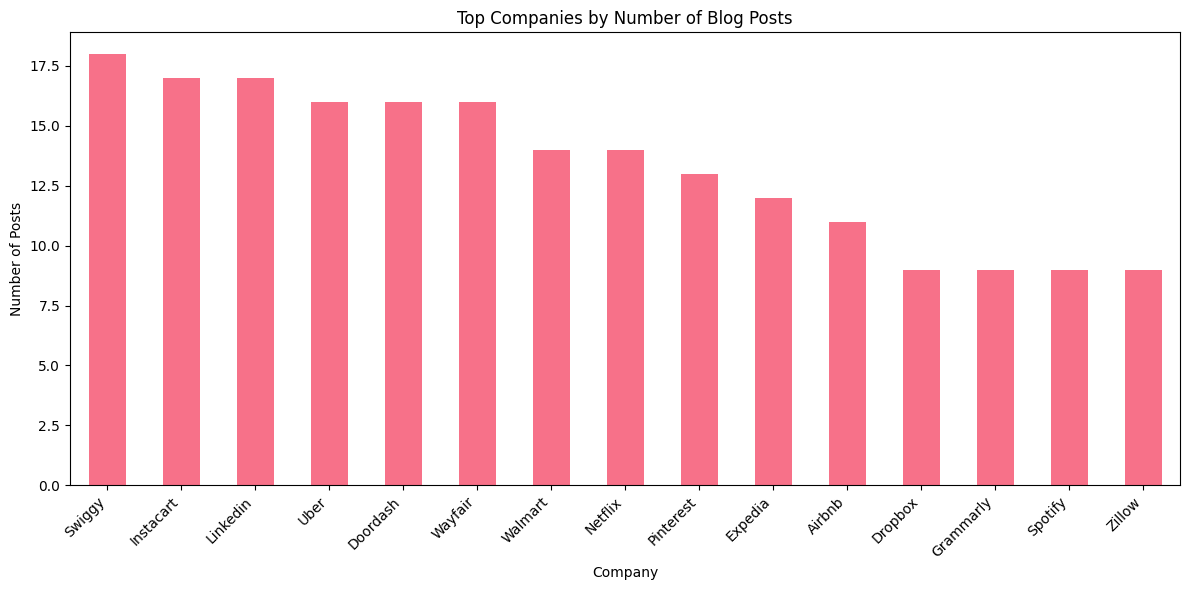

In [11]:
# Top companies by number of blog posts
print("🏆 Top 15 Companies by Blog Count:")
company_counts = df['company'].value_counts().head(15)
print(company_counts)

# Visualize
plt.figure(figsize=(12, 6))
company_counts.plot(kind='bar')
plt.title('Top Companies by Number of Blog Posts')
plt.xlabel('Company')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 3. Category Analysis


📂 Category Distribution:
category
Recommendation System                62
LLM genAI                            33
Product                              32
Fraud Detection                      22
genAI LLM                            21
                                     ..
LLM Foundation Model Optimization     1
genAI Product CV                      1
Product genAI LLM                     1
NLP Product genAI LLM                 1
NLP Product genAI                     1
Name: count, Length: 72, dtype: int64


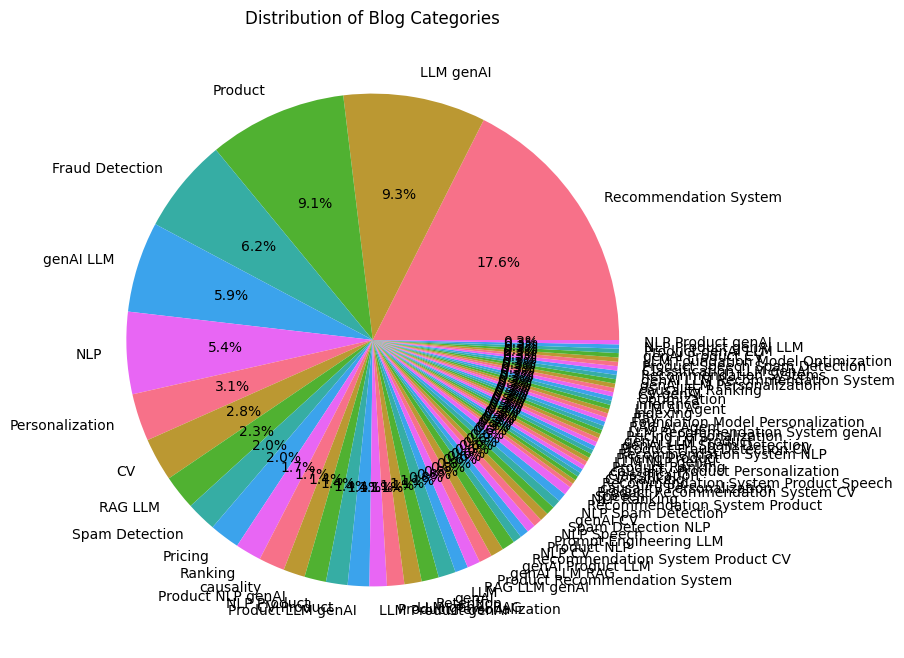

In [12]:
# Category distribution
print("📂 Category Distribution:")
category_counts = df['category'].value_counts()
print(category_counts)

# Visualize categories
plt.figure(figsize=(12, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Blog Categories')
plt.ylabel('')
plt.show()


## 4. Year Analysis


📅 Posts by Year:
year
2021     78
2022     91
2023    155
2024    135
2025     13
Name: count, dtype: int64


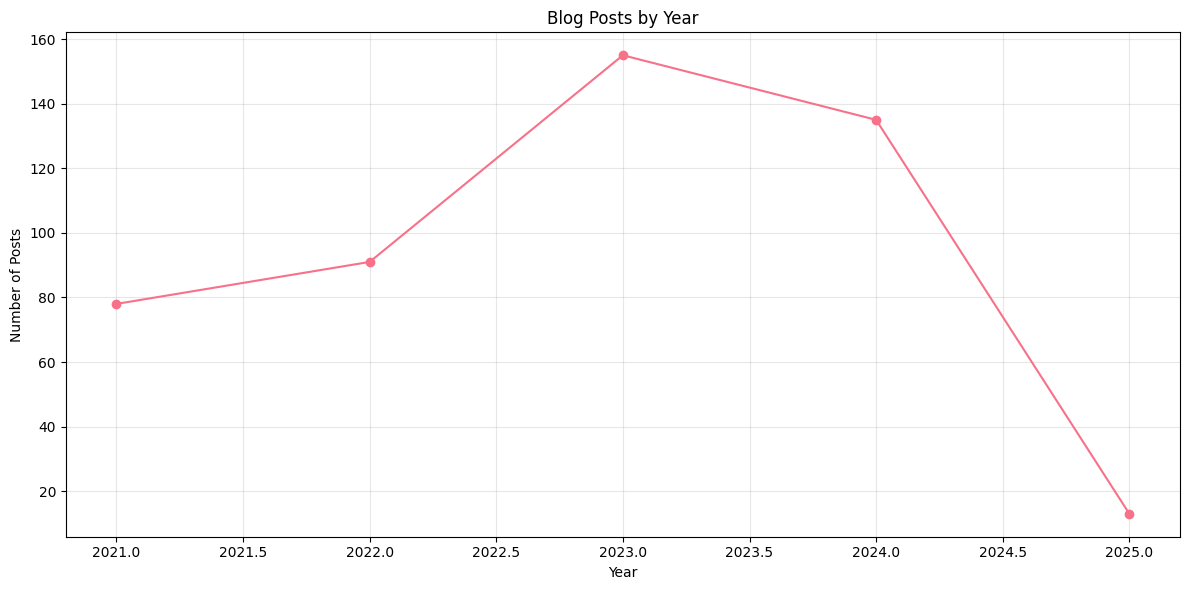

In [13]:
# Year distribution
print("📅 Posts by Year:")
year_counts = df['year'].value_counts().sort_index()
print(year_counts)

# Visualize year trends
plt.figure(figsize=(12, 6))
year_counts.plot(kind='line', marker='o')
plt.title('Blog Posts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 5. SQLite Database Queries


In [14]:
# Connect to SQLite database using dynamic path
db_path = current_dir / 'storage' / 'table_data.db'
conn = sqlite3.connect(str(db_path))
cursor = conn.cursor()

# Check if table exists and get schema
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(f"📊 Tables in database: {tables}")

# If table exists, get schema
if tables:
    cursor.execute(f"PRAGMA table_info({tables[0][0]});")
    columns = cursor.fetchall()
    print(f"\n📋 Table schema:")
    for col in columns:
        print(f"  {col[1]} ({col[2]})")

conn.close()


📊 Tables in database: [('data',)]

📋 Table schema:
  company (TEXT)
  title (TEXT)
  tags (TEXT)
  year (TEXT)
  url (TEXT)


## 6. Advanced Queries


🚀 Most Active Companies (2020+):
company
Swiggy       18
Instacart    17
Linkedin     17
Uber         16
Doordash     16
Wayfair      16
Walmart      14
Netflix      14
Pinterest    13
Expedia      12
Name: count, dtype: int64


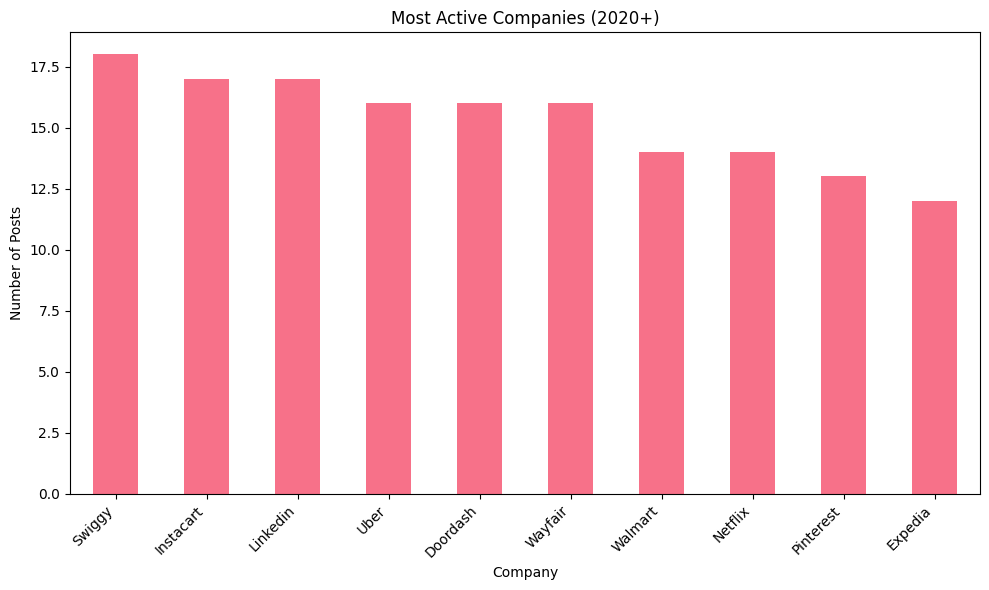

In [15]:
# Query 1: Most active companies in recent years (2020+)
print("🚀 Most Active Companies (2020+):")
recent_df = df[df['year'].astype(int) >= 2020]
recent_companies = recent_df['company'].value_counts().head(10)
print(recent_companies)

# Visualize
plt.figure(figsize=(10, 6))
recent_companies.plot(kind='bar')
plt.title('Most Active Companies (2020+)')
plt.xlabel('Company')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [16]:
# Query 2: Find blogs with specific keywords
print("🔍 Blogs containing 'Machine Learning' or 'ML':")
ml_blogs = df[df['title'].str.contains('Machine Learning|ML', case=False, na=False)]
print(f"Found {len(ml_blogs)} ML-related blogs")
print("\nSample titles:")
for idx, row in ml_blogs.head(10).iterrows():
    print(f"  • {row['company']}: {row['title']}")


🔍 Blogs containing 'Machine Learning' or 'ML':
Found 80 ML-related blogs

Sample titles:
  • Careem: Temporary holds: Leveraging machine learning models to reduce fraud
  • Foodpanda: Sculpturing: Optimising Budget through Machine Learning
  • Netflix: Evolving from Rule-based Classifier: Machine Learning Powered Auto Remediation in Netflix Data Platform
  • Foodpanda: The Making: Optimising Budget through Machine Learning
  • Uber: DataK9: Auto-categorizing an exabyte of data at field level through AI/ML
  • Foodpanda: Introduction: Optimising Budget through Machine Learning
  • Feedzai: Building Trust in a Digital World: The Role of Machine Learning in Behavioral Biometrics
  • Cloudflare: Using machine learning to detect bot attacks that leverage residential proxies
  • Shopify: How Shopify improved consumer search intent with real-time ML
  • Roblox: Deploying ML for Voice Safety


🌐 Top Blog Platforms:
domain
medium.com                  127
bytes.swiggy.com             18
aboutwayfair.com             16
uber.com                     16
tech.instacart.com           15
doordash.engineering         15
engineering.linkedin.com     13
netflixtechblog.com          12
arxiv.org                    11
engineering.grab.com         10
Name: count, dtype: int64


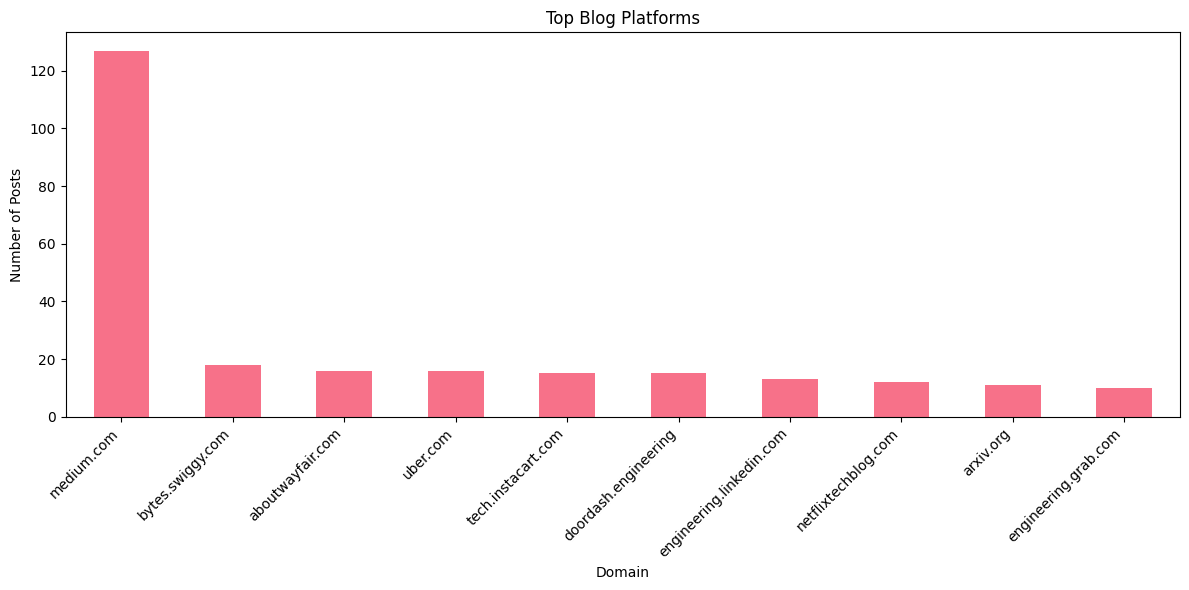

In [17]:
# Query 3: URL domain analysis
print("🌐 Top Blog Platforms:")
df['domain'] = df['url'].str.extract(r'https?://(?:www\.)?([^/]+)')
domain_counts = df['domain'].value_counts().head(10)
print(domain_counts)

# Visualize
plt.figure(figsize=(12, 6))
domain_counts.plot(kind='bar')
plt.title('Top Blog Platforms')
plt.xlabel('Domain')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 7. Interactive Search Function


In [19]:
# Custom query function
def search_blogs(keyword=None, company=None, category=None, year=None):
    """
    Search for blogs with specific criteria
    """
    result = df.copy()
    
    if keyword:
        result = result[result['title'].str.contains(keyword, case=False, na=False)]
    
    if company:
        result = result[result['company'].str.contains(company, case=False, na=False)]
    
    if category:
        result = result[result['category'].str.contains(category, case=False, na=False)]
    
    if year:
        result = result[result['year'] == str(year)]
    
    return result

# Example searches
print("🔍 Example Searches:")
print("\n1. Search for 'AI' blogs:")
ai_blogs = search_blogs('AI')
print(f"Found {len(ai_blogs)} AI-related blogs")

print("\n2. Search for Google blogs:")
google_blogs = search_blogs(company='Google')
print(f"Found {len(google_blogs)} Google blogs")

print("\n3. Search for 2024 blogs:")
blogs_2024 = search_blogs(year=2024)
print(f"Found {len(blogs_2024)} blogs from 2024")


🔍 Example Searches:

1. Search for 'AI' blogs:
Found 106 AI-related blogs

2. Search for Google blogs:
Found 7 Google blogs

3. Search for 2024 blogs:
Found 0 blogs from 2024


## 8. Category Word Analysis


In [20]:
# Split categories by space and count unique words
print("🔤 Category Word Analysis:")
print("=" * 50)

# Get all non-null categories
categories = df['category'].dropna()

# Split each category by space and flatten the list
all_words = []
for category in categories:
    if pd.notna(category) and category.strip():  # Check for non-empty strings
        words = category.split()
        all_words.extend(words)

# Count unique words
word_counts = pd.Series(all_words).value_counts()

print(f"📊 Total unique words in categories: {len(word_counts)}")
print(f"📝 Total word occurrences: {len(all_words)}")
print(f"📈 Average words per category: {len(all_words) / len(categories):.2f}")

print("\n🏆 Top 20 Most Common Words:")
print(word_counts.head(20))


🔤 Category Word Analysis:
📊 Total unique words in categories: 29
📝 Total word occurrences: 670
📈 Average words per category: 1.90

🏆 Top 20 Most Common Words:
LLM                100
genAI               99
Product             84
Recommendation      75
System              74
NLP                 44
Detection           36
CV                  26
Fraud               23
Personalization     20
RAG                 19
Spam                13
Ranking             10
causality            9
Pricing              9
Speech               5
Retention            4
Classification       2
Optimization         2
Prompt               2
Name: count, dtype: int64


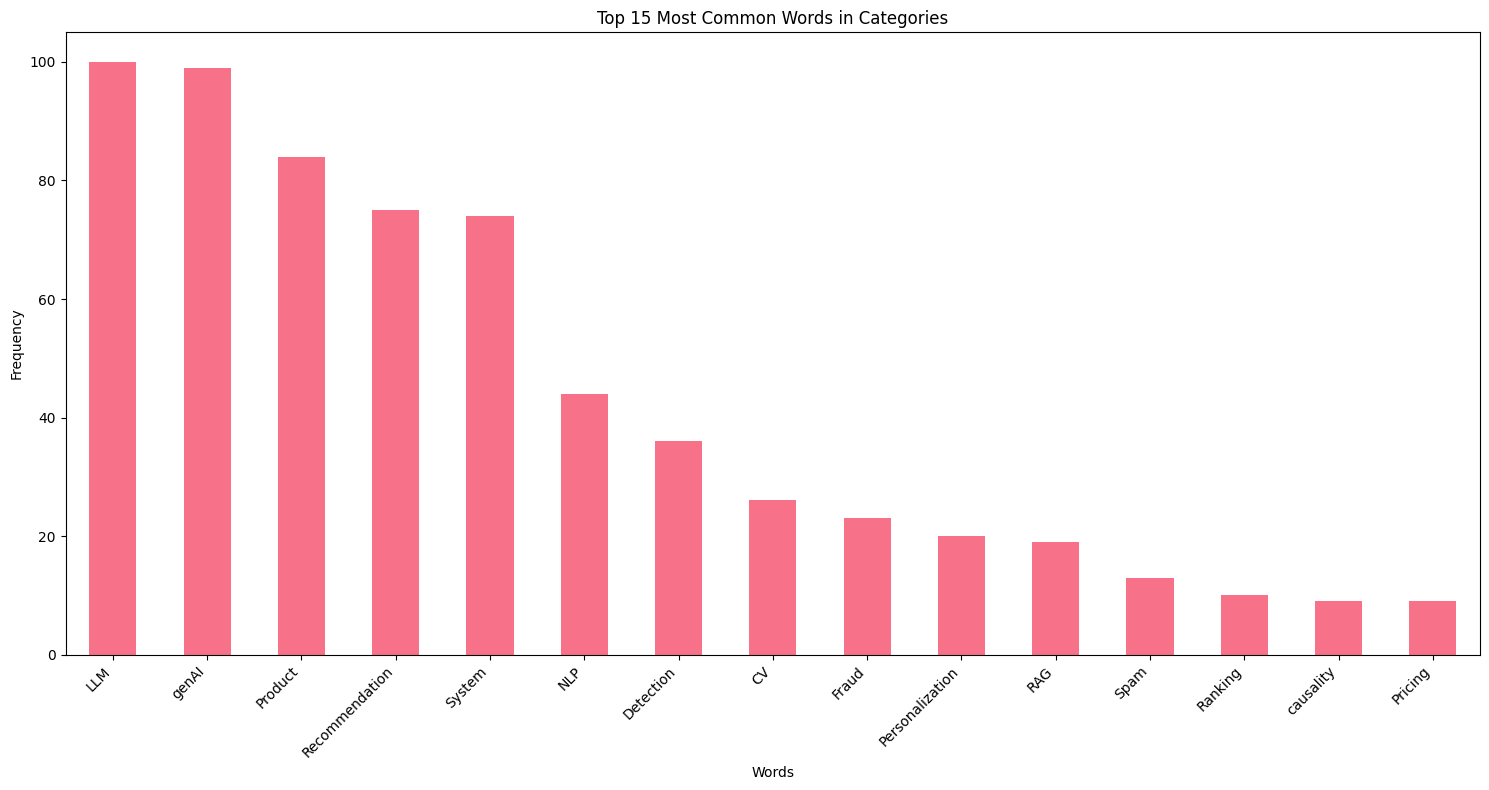

In [21]:
# Visualize the word frequency
plt.figure(figsize=(15, 8))
top_words = word_counts.head(15)
top_words.plot(kind='bar')
plt.title('Top 15 Most Common Words in Categories')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [22]:
# More detailed analysis
print("📋 Detailed Word Analysis:")
print("=" * 50)

# Show words that appear only once
single_occurrence = word_counts[word_counts == 1]
print(f"🔤 Words appearing only once: {len(single_occurrence)}")
print("Sample single-occurrence words:")
print(single_occurrence.head(10).index.tolist())

print(f"\n📊 Word length distribution:")
word_lengths = [len(word) for word in all_words]
length_counts = pd.Series(word_lengths).value_counts().sort_index()
print(length_counts.head(10))

# Show some examples of multi-word categories
print(f"\n📝 Examples of multi-word categories:")
multi_word_categories = categories[categories.str.contains(' ', na=False)]
print(multi_word_categories.head(10).tolist())


📋 Detailed Word Analysis:
🔤 Words appearing only once: 4
Sample single-occurrence words:
['inference', 'Indexing', 'Ray', 'Systems']

📊 Word length distribution:
2      28
3     164
4      13
5     126
6      81
7     104
8       1
9      50
10      2
11      2
Name: count, dtype: int64

📝 Examples of multi-word categories:
['LLM genAI', 'LLM Foundation Model Optimization', 'Prompt Engineering LLM', 'RAG AI Agent', 'Foundation Model Personalization', 'Prompt Engineering LLM', 'RAG LLM', 'LLM AI Agent', 'Recommendation System', 'Product Personalization']


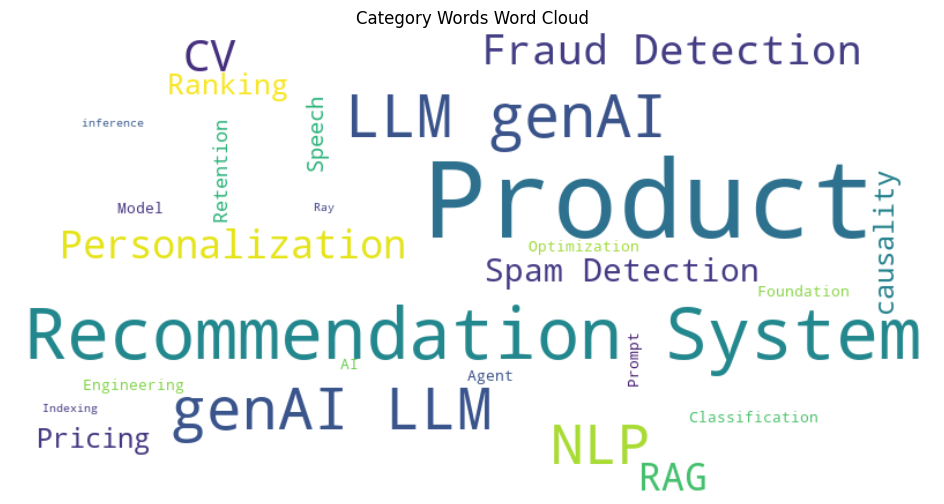

In [23]:
# Create a word cloud (optional - requires wordcloud library)
try:
    from wordcloud import WordCloud
    
    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Category Words Word Cloud')
    plt.show()
    
except ImportError:
    print("💡 Install wordcloud library for word cloud visualization:")
    print("pip install wordcloud")
    
    # Alternative: Show word frequency as text
    print("\n📊 Word Frequency Table (Top 30):")
    print(word_counts.head(30).to_string())


## 9. Check Crawlee Native Data Storage

In [24]:
# Check Crawlee native data storage
import json
from pathlib import Path

def check_crawlee_datasets():
    """Check what data was saved using context.push_data()"""
    
    datasets_dir = current_dir / 'storage' / 'datasets'
    
    print("🔍 Crawlee Dataset Storage:")
    print("=" * 40)
    
    if not datasets_dir.exists():
        print("❌ No datasets directory found")
        return
    
    # Find all JSON files in datasets
    json_files = list(datasets_dir.glob("**/*.json"))
    
    if not json_files:
        print("❌ No dataset JSON files found")
        return
    
    print(f"📄 Found {len(json_files)} dataset files:")
    
    for json_file in json_files:
        print(f"\n📁 {json_file.name}")
        try:
            with open(json_file, 'r') as f:
                data = json.load(f)
            
            if isinstance(data, list):
                print(f"  📊 Records: {len(data)}")
                if data and isinstance(data[0], dict):
                    print(f"  🔑 Fields: {list(data[0].keys())}")
                    
                    # Show first few records
                    print(f"  📄 First 3 records:")
                    for i, record in enumerate(data[:3]):
                        print(f"    Record {i+1}:")
                        for key, value in record.items():
                            if isinstance(value, str) and len(value) > 80:
                                value = value[:80] + "..."
                            print(f"      {key}: {value}")
            else:
                print(f"  📊 Data type: {type(data)}")
                
        except Exception as e:
            print(f"  ❌ Error reading file: {e}")

# Run the check
check_crawlee_datasets()


🔍 Crawlee Dataset Storage:
📄 Found 473 dataset files:

📁 000000096.json
  📊 Data type: <class 'dict'>

📁 000000429.json
  📊 Data type: <class 'dict'>

📁 000000079.json
  📊 Data type: <class 'dict'>

📁 000000350.json
  📊 Data type: <class 'dict'>

📁 000000215.json
  📊 Data type: <class 'dict'>

📁 000000184.json
  📊 Data type: <class 'dict'>

📁 000000307.json
  📊 Data type: <class 'dict'>

📁 000000242.json
  📊 Data type: <class 'dict'>

📁 000000468.json
  📊 Data type: <class 'dict'>

📁 000000192.json
  📊 Data type: <class 'dict'>

📁 000000038.json
  📊 Data type: <class 'dict'>

📁 000000311.json
  📊 Data type: <class 'dict'>

📁 000000254.json
  📊 Data type: <class 'dict'>

📁 000000080.json
  📊 Data type: <class 'dict'>

📁 000000346.json
  📊 Data type: <class 'dict'>

📁 000000203.json
  📊 Data type: <class 'dict'>

📁 000000014.json
  📊 Data type: <class 'dict'>

📁 000000444.json
  📊 Data type: <class 'dict'>

📁 000000151.json
  📊 Data type: <class 'dict'>

📁 000000278.json
  📊 Data type: <

In [29]:
# Load Crawlee native data into DataFrame for analysis
def load_crawlee_data():
    """Load Crawlee dataset data into a pandas DataFrame"""
    
    datasets_dir = current_dir / 'storage' / 'datasets' / 'default'
    
    if not datasets_dir.exists():
        print("❌ No datasets/default directory found")
        return None
    
    # Find all JSON files (excluding metadata)
    json_files = [f for f in datasets_dir.glob("*.json") if not f.name.startswith('__')]
    
    if not json_files:
        print("❌ No dataset JSON files found")
        return None
    
    print(f"📄 Found {len(json_files)} JSON files in Crawlee storage")
    
    # Load all records
    records = []
    for json_file in sorted(json_files):
        try:
            with open(json_file, 'r') as f:
                data = json.load(f)
            
            if isinstance(data, dict):
                records.append(data)
            else:
                print(f"⚠️ Skipping {json_file.name}: not a dictionary")
                
        except Exception as e:
            print(f"⚠️ Error loading {json_file.name}: {e}")
            continue
    
    if not records:
        print("❌ No valid records found")
        return None
    
    # Convert to DataFrame
    crawlee_df = pd.DataFrame(records)
    print(f"✅ Loaded {len(crawlee_df)} records from Crawlee storage")
    print(f"📊 Columns: {list(crawlee_df.columns)}")
    
    return crawlee_df

# Load the data
crawlee_df = load_crawlee_data()

if crawlee_df is not None:
    print(f"\n📊 Crawlee Data Overview:")
    print(f"Shape: {crawlee_df.shape}")
    print(f"\nFirst few rows:")
    print(crawlee_df.head())
    
    print(f"\n📋 Data types:")
    print(crawlee_df.dtypes)
    
    # Compare with CSV data if available
    if 'df' in locals():
        print(f"\n🔄 Comparison with CSV data:")
        print(f"CSV shape: {df.shape}")
        print(f"Crawlee shape: {crawlee_df.shape}")
        print(f"Columns match: {set(df.columns) == set(crawlee_df.columns)}")
        
        # Check for differences in column names
        csv_cols = set(df.columns)
        crawlee_cols = set(crawlee_df.columns)
        if csv_cols != crawlee_cols:
            print(f"📋 Column differences:")
            print(f"  CSV only: {csv_cols - crawlee_cols}")
            print(f"  Crawlee only: {crawlee_cols - csv_cols}")
else:
    print("❌ Could not load Crawlee data")


📄 Found 472 JSON files in Crawlee storage
✅ Loaded 472 records from Crawlee storage
📊 Columns: ['company', 'title', 'tags', 'year', 'url']

📊 Crawlee Data Overview:
Shape: (472, 5)

First few rows:
            company                                              title  \
0  Google Deep Mind  Gemini 2.5: Pushing the Frontier with Advanced...   
1          deepseek  Insights into DeepSeek-V3: Scaling Challenges ...   
2              Misc  The Prompt Report: A Systematic Survey of Prom...   
3           Dropbox  Building Dash: How RAG and AI agents help us m...   
4           Netflix   Foundation Model for Personalized Recommendation   

                                tags  year  \
0                          LLM genAI  2025   
1  LLM Foundation Model Optimization  2025   
2             Prompt Engineering LLM  2025   
3                       RAG AI Agent  2025   
4   Foundation Model Personalization  2025   

                                                 url  
0  https://storage.google

In [30]:
crawlee_df


,company,title,tags,year,url
0,Google Deep Mind,Gemini 2.5: Pushing the Frontier with Advanced...,LLM genAI,2025,https://storage.googleapis.com/deepmind-media/...
1,deepseek,Insights into DeepSeek-V3: Scaling Challenges ...,LLM Foundation Model Optimization,2025,https://arxiv.org/pdf/2505.09343v1
2,Misc,The Prompt Report: A Systematic Survey of Prom...,Prompt Engineering LLM,2025,https://arxiv.org/pdf/2406.06608
3,Dropbox,Building Dash: How RAG and AI agents help us m...,RAG AI Agent,2025,https://dropbox.tech/machine-learning/building...
4,Netflix,Foundation Model for Personalized Recommendation,Foundation Model Personalization,2025,https://netflixtechblog.com/foundation-model-f...
...,...,...,...,...,...
467,Wayfair,Share of Voice Optimization Engine,Personalization,2021,https://www.aboutwayfair.com/careers/tech-blog...
468,Wayfair,Contextual Bandit for Marketing Treatment Opti...,,2021,https://www.aboutwayfair.com/careers/tech-blog...
469,Microsoft,How we used ML — and heuristic data labeling —...,,2021,https://medium.com/data-science-at-microsoft/h...
470,Mercado Libre,How we design our push notifications strategy ...,,2021,https://medium.com/mercadolibre-tech/how-we-de...
